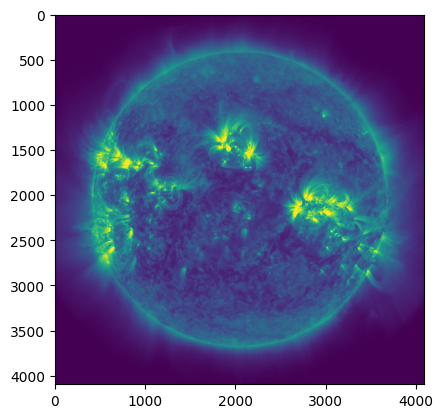

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Ścieżka do obrazu
image_path = '/content/2014_02_25__15_10_23_34__SDO_AIA_AIA_171.jp2'

# Wczytanie obrazu przy użyciu biblioteki matplotlib
img = mpimg.imread(image_path)

# Wyświetlenie obrazu
plt.imshow(img)

In [10]:
import scipy
from scipy.io import readsav

x = readsav('/content/erupt_str.sav')

# Wywołanie poszczególnych porcji z pliku

x_start = x['erupt_str']['X_START']

print(x_start)

[-75.159355]


In [ ]:
!pip install sunpy

import cv2
import os
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import datetime

#zaczytanie sav
import scipy
from scipy.io import readsav

#sunpy
import sunpy.time
from astropy.time import Time

In [12]:
# Odczyt danych czasowych (start - peak - end)
path = ""
x = readsav(os.path.join(path,"/content/erupt_str.sav"))

start = x['erupt_str']['T_START']
peak = x['erupt_str']['T_PEAK']
end = x['erupt_str']['T_END']

start = sunpy.time.parse_time(start[0],format='utime')
peak = sunpy.time.parse_time(peak[0],format='utime')
end = sunpy.time.parse_time(end[0],format='utime')
print(f'Start: {start.datetime}',f'Peak: {peak.datetime}',f'End: {end.datetime}',sep='\n')

Start: 2014-02-25 15:00:12.340000
Peak: 2014-02-25 15:08:13.480000
End: 2014-02-25 16:52:12.340000


In [13]:
#skala plytowa = ?
#jednostka w AU = ?
x_start = x['erupt_str']['X_START']
y_start = x['erupt_str']['Y_START']

# Koordynaty zjawiska 
print("arcsec coordinates:", x_start, y_start)


arcsec coordinates: [-75.159355] [333.766]


In [14]:
#maska
mask = x['erupt_str']['MASK']
print(mask)

[array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)          ]


In [18]:
# Konwersja z JP2000 do jpg

path_to_images = 'jp2tojpg\\zdjecia'
output_folder_dir = "D:\\jp2tojpg\\converted\\"

img_dirs = []
try:
  for i in os.listdir(path_to_images):

    img_dir = os.path.join(path_to_images,i)
    image = cv2.imread(img_dir)
    tab = i.split(".")
    output_image_name = tab[0] + ".png"
    cv2.imwrite(output_folder_dir+output_image_name, image)
except:
  print("Nie można odnaleźć plików")

Nie można odnaleźć plików


In [19]:
from PIL import Image
import os

# Ścieżka do folderu ze zdjęciami
folder_path = '/content/'

# Przeglądanie plików w folderze
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        # Sprawdzenie, czy plik jest obrazem
        try:
            img = Image.open(file_path)
            # Wyświetlanie obrazu
            #img.show()
        except (IOError, OSError):
            print(f"Nie można otworzyć pliku: {file_path}")


Nie można otworzyć pliku: /content/erupt_str.sav


In [21]:
# Wyświetlenie headera
#!pip install sunpy.io
!pip install glymur
from sunpy.io import jp2
path_to_jp2 = '/content/2014_02_25__15_00_11_34__SDO_AIA_AIA_171.jp2'
header = jp2.get_header(path_to_jp2)
header

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 40.3 MB/s eta 0:00:00


[FileHeader([('SIMPLE', 1),
             ('BITPIX', 16),
             ('NAXIS', 2),
             ('NAXIS1', 4096),
             ('NAXIS2', 4096),
             ('EXTEND', 1),
             ('DATE_OBS', '2014-02-25T15:00:11.34'),
             ('ORIGIN', 'SDO'),
             ('DATE', '2014-02-25T15:12:13'),
             ('TELESCOP', 'SDO'),
             ('INSTRUME', 'AIA_3'),
             ('DATE-OBS', '2014-02-25T15:00:11.34'),
             ('T_OBS', '2014-02-25T15:00:12.34Z'),
             ('TOBSSTEP', 1.0),
             ('TOBSEPOC', '1977.01.01_00:00:00_TAI'),
             ('CAMERA', 3),
             ('IMG_TYPE', 'LIGHT'),
             ('EXPTIME', 2.000176),
             ('EXPSDEV', 0.000124),
             ('INT_TIME', 2.273438),
             ('WAVELNTH', 171),
             ('WAVEUNIT', 'angstrom'),
             ('WAVE_STR', '171_THIN'),
             ('FSN', 84172978),
             ('FID', 0),
             ('LVL_NUM', 1.5),
             ('QUALLEV0', 0),
             ('QUALITY', 107374182

In [36]:
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import glob
from scipy.io import readsav
from PIL import Image
from sunpy.io import jp2
from IPython.display import Image as show_gif

#!pip install networkx
#!pip install imagemagick
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter, ImageMagickBase, ImageMagickWriter

class ImageToGIF:
    """Create GIF from event image files"""
    def __init__(self,
                 image_id,
                 size=(600, 400),
                 crop=None,
                 xy_text=(10, 10),
                 dpi=100,
                 cmap='copper'):

        self.crop = crop
        self.cmap = cmap
        
        self.images = []
        img_paths = glob.glob(f'/content/{image_id}*.jp2', recursive=True)

        for image in img_paths:
            self.images.append(Image.open(image))

        if self.crop is not None:
            pixel_scale = jp2.get_header(img_paths[0])[0]['IMSCL_MP']
            
            data_path = glob.glob(f'/content/{image_id}.sav', recursive=True)[0]
            data = readsav(data_path)['erupt_str']
            
            self.pixel_x = data['X_START'][0] / pixel_scale + self.images[0].size[0] // 2
            self.pixel_y = data['Y_START'][0] / pixel_scale + self.images[0].size[1] // 2

        self.fig = plt.figure()
        self.fig.set_size_inches(size[0] / dpi, size[1] / dpi)
        self.xy_text = xy_text
        
        self.ax = self.fig.add_axes([0, 0, 1, 1])
        self.ax.set_xticks([])
        self.ax.set_yticks([])
        self.gif_images = []
        self.create_gif()
        
    def create_gif(self):
        for i in range(len(self.images)):
            self.add(self.images[i], label=f'img_{str(i)}')
 
    def add(self, *args, label):
        
        image = args[0]
        if self.crop is not None:
            image = image.crop((self.pixel_x-self.crop, self.pixel_y-self.crop, self.pixel_x+self.crop, self.pixel_y+self.crop))
            
        plt_img = self.ax.imshow(image, cmap=self.cmap, animated=True)

        plt_text = self.ax.text(*self.xy_text, label, color='red')
        to_plot = [plt_img, plt_text]
        self.gif_images.append(to_plot)
        plt.close()
 
    def save(self, filename, fps):
        animation = anim.ArtistAnimation(self.fig, self.gif_images)
        animation.save(filename, writer='imagemagick', fps=fps)
        
if __name__ == '__main__':
    image_id = input("Event ID: ")

    sample_data_gif = ImageToGIF(
        image_id,
        size=(1024, 1024),
        crop=400,
    )

    sample_data_gif.save('event.gif', fps=15)
    show_gif('event.gif', format='png')


Event ID: 11195
